# Решающие деревья

In [1]:
import pandas as pd


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

## Логистическая регрессия. Из предыдущего урока

Теория по этому блоку в презентации

In [2]:
df = pd.read_csv('telecom_churn.csv')

In [3]:
var_cat = ['State', 'Area code', 'International plan', 'Voice mail plan']

var_real = ['Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total day charge', 'Total eve minutes',
            'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes',
            'Total intl calls', 'Total intl charge', 
            'Customer service calls', 'Account length']


df[var_cat] = df[var_cat].astype('object')
df = pd.get_dummies(df, drop_first=True)


X = df.drop('Churn', axis=1)
y = df['Churn']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Churn'])

In [5]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

/Users/elentevanyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
y_pred_proba = model_logreg.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))

0.7442756375474769


## Одинокий дуб

In [7]:
model_tree = DecisionTreeClassifier(max_depth=20)


model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict_proba(X_test)


print(roc_auc_score(y_test, y_pred_tree[:, 1]))

0.8343100018086453


#### Подбор параметров

- **criterion** {“gini”, “entropy”}, default=”gini” <br>
Критерий информативности для оценки качества разбиения.

- **splitter**: {“best”, “random”}, default=”best” <br>
Стратегия для разбиения в каждой вершине. 

- **max_depth**: default=0 <br>
Максимальная глубина дерева. 

- **min_samples_split**: int or float, default=2 <br>
Количество объектов в вершине, необходимое для разбиения.

- **min_samples_leaf**: int or float, default=1 <br>
Минимальное число объектов, которое должно находиться в листьях. 

- **max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None <br>
Количество признаков, которое изучается при поиске наилучшего разбиения
The number of features to consider when looking for the best split:

И другие

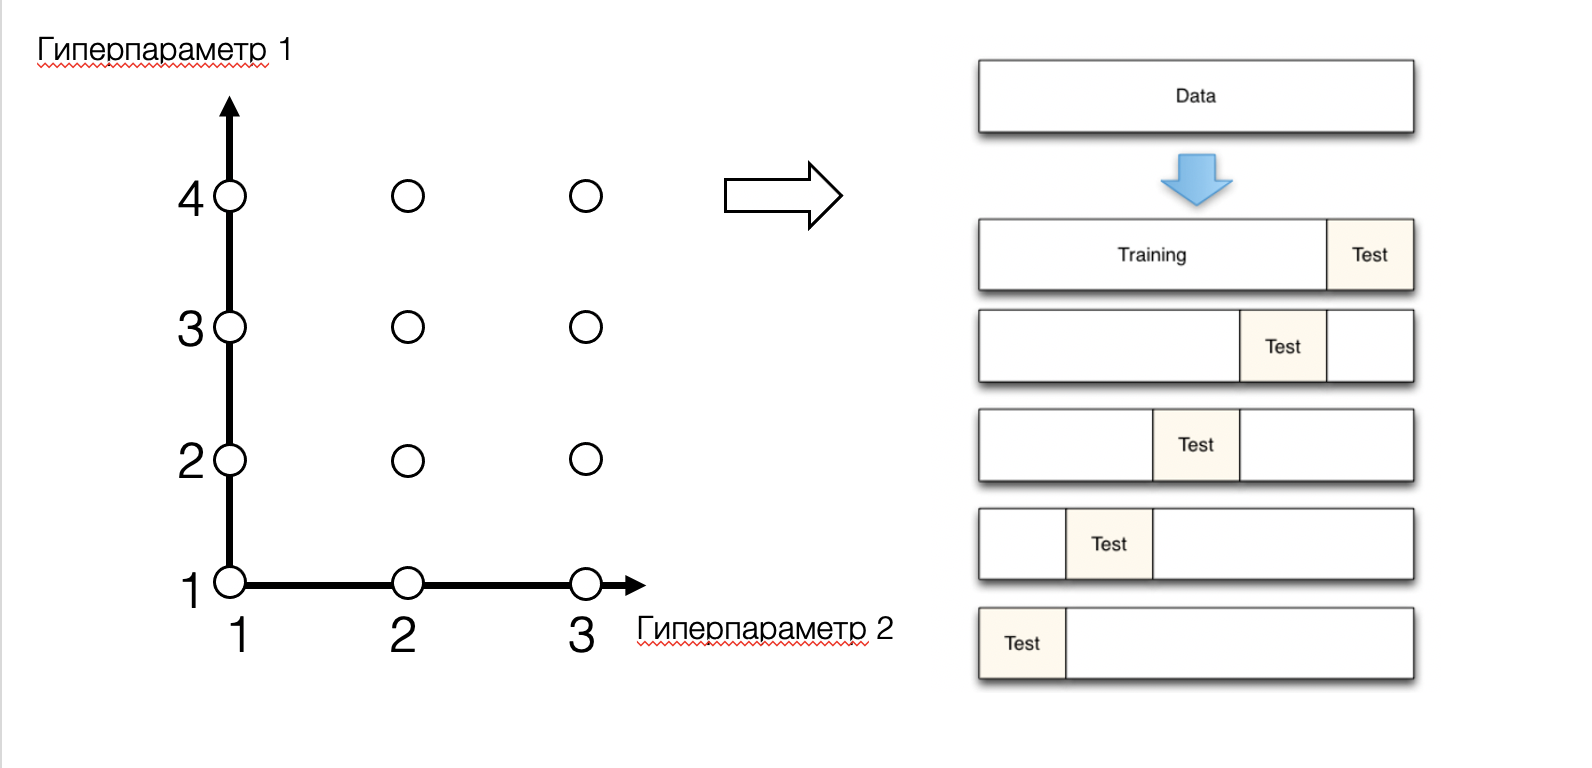

In [8]:
model = DecisionTreeClassifier() 

param_grid = {'max_depth': [3, 5, 7, 10, 15], 'criterion': ['gini', 'entropy']}
grid_cv = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')


grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15]},
             scoring='roc_auc')

In [9]:
print('Лучшее значение параметра:', grid_cv.best_params_)
print('Лучшее качество:', grid_cv.best_score_)

Лучшее значение параметра: {'criterion': 'gini', 'max_depth': 5}
Лучшее качество: 0.8864812453628244


In [10]:
model_tree = grid_cv.best_estimator_

y_pred_tree_proba = model_tree.predict_proba(X_test)
roc_tree = roc_auc_score(y_test, y_pred_tree_proba[:, 1])
print(roc_tree)
print(roc_auc_score(y_train, model_tree.predict_proba(X_train)[:, 1]))

0.8559504431181046
0.9210924006908463


In [11]:
!pip install lightgbm

## Запись файла

In [12]:
import pickle

filename = 'modelfile.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_tree, f)

In [13]:
import joblib
file = 'model.pkl'
joblib.dump(model_tree, file)

['model.pkl']